# 3. Machine learning models codes, performance assessment and explanation.

In [3]:
import pandas as pd

## 3.1. Pollutants concentrations mean per Borough.

### 3.1.1. Geographical location of the Boroughs.

In [6]:
file = pd.read_csv(r"C:\Users\Benoit Loze\Desktop\CSCK503_EMA_KNNModel\LAEI2013_Emissions_Summary-CO2_v1.1.csv")

In [7]:
df = pd.DataFrame(file)
df.head()

,Year,LAEI 1km2 ID,GRID_ExactCut_ID,Easting,Northing,Borough,Zone,Household and Garden,Small Waste and Accidental Fires,Agriculture,...,Diesel Car,Electric Car,Petrol LGV,Diesel LGV,Electric LGV,TfL Bus,Non-TfL Bus and Coach,Artic HGV,Rigid HGV,Total
0,2008,5910,1,510500,203500,NonGLA,NonGLA,-,-,-,...,28.20,-,0.53,11.05,-,0.98,3.44,1.06,6.78,886.07
1,2008,5911,2,511500,203500,NonGLA,NonGLA,-,-,-,...,"2,779.41",-,82.96,"1,515.76",-,30.34,193.36,"2,591.99","1,153.95","13,999.04"
2,2008,5912,3,512500,203500,NonGLA,NonGLA,-,-,-,...,"1,398.22",-,45.00,721.11,-,5.99,79.09,"1,899.21",620.27,"7,950.19"
3,2008,5915,4,515500,203500,NonGLA,NonGLA,-,-,-,...,28.11,-,0.53,11.01,-,0.97,3.43,1.05,6.76,"11,873.98"
4,2008,5916,5,516500,203500,NonGLA,NonGLA,-,-,-,...,25.38,-,0.48,9.94,-,0.88,3.09,0.95,6.10,"5,534.79"


In [8]:
df.columns

Index(['Year', 'LAEI 1km2 ID', 'GRID_ExactCut_ID', 'Easting', 'Northing',
       'Borough', 'Zone', 'Household and Garden',
       'Small Waste and Accidental Fires', 'Agriculture', 'STW', 'WTS',
       'Landfill', 'NRMM Construction', 'NRMM Industry', 'C&D Dust',
       'Domestic Gas', 'Commercial Gas', 'Domestic Other Fuels',
       'Commercial Other Fuels', 'Industry Part A', 'Industry Part B',
       'Aviation', 'Passenger Shipping', 'Commercial Shipping', 'Rail Freight',
       'Rail Passengers', 'Resuspension', 'Motorcycle', 'Taxi', 'Petrol Car',
       'Diesel Car', 'Electric Car', 'Petrol LGV', 'Diesel LGV',
       'Electric LGV', 'TfL Bus', 'Non-TfL Bus and Coach', 'Artic HGV',
       'Rigid HGV', 'Total'],
      dtype='object')

In [9]:
borough_location = df[['Easting', 'Northing', 'Borough']]

In [10]:
boroughs = borough_location["Borough"].unique()
boroughs

array(['NonGLA', 'Enfield', 'Barnet', 'Waltham Forest', 'Harrow',
       'Redbridge', 'Havering', 'Hillingdon', 'Brent', 'Haringey',
       'Barking and Dagenham', 'Hackney', 'Camden', 'Islington', 'Newham',
       'Ealing', 'Tower Hamlets', 'Hammersmith and Fulham',
       'City of Westminster', 'Kensington and Chelsea', 'Southwark',
       'Greenwich', 'Bexley', 'Hounslow', 'Richmond', 'Lewisham',
       'Wandsworth', 'Lambeth', 'Kingston', 'Merton', 'Bromley',
       'Croydon', 'Sutton', 'City'], dtype=object)

In [11]:
groups = borough_location.groupby("Borough")
groups
for name, group in groups:
    print(name, group)

Barking and Dagenham        Easting  Northing               Borough
661     547500    190500  Barking and Dagenham
662     549500    190500  Barking and Dagenham
701     547500    188500  Barking and Dagenham
703     549500    188500  Barking and Dagenham
747     547500    186500  Barking and Dagenham
...        ...       ...                   ...
19623   546500    183500  Barking and Dagenham
19624   548500    183500  Barking and Dagenham
19626   550500    183500  Barking and Dagenham
19654   546500    181500  Barking and Dagenham
19656   548500    181500  Barking and Dagenham

[354 rows x 3 columns]
Barnet        Easting  Northing Borough
535     523500    198500  Barnet
537     525500    198500  Barnet
549     521500    196500  Barnet
550     523500    196500  Barnet
551     525500    196500  Barnet
...        ...       ...     ...
19480   526500    189500  Barnet
19512   522500    187500  Barnet
19514   524500    187500  Barnet
19517   526500    187500  Barnet
19561   524500    185

In [12]:
import matplotlib.pyplot as plt

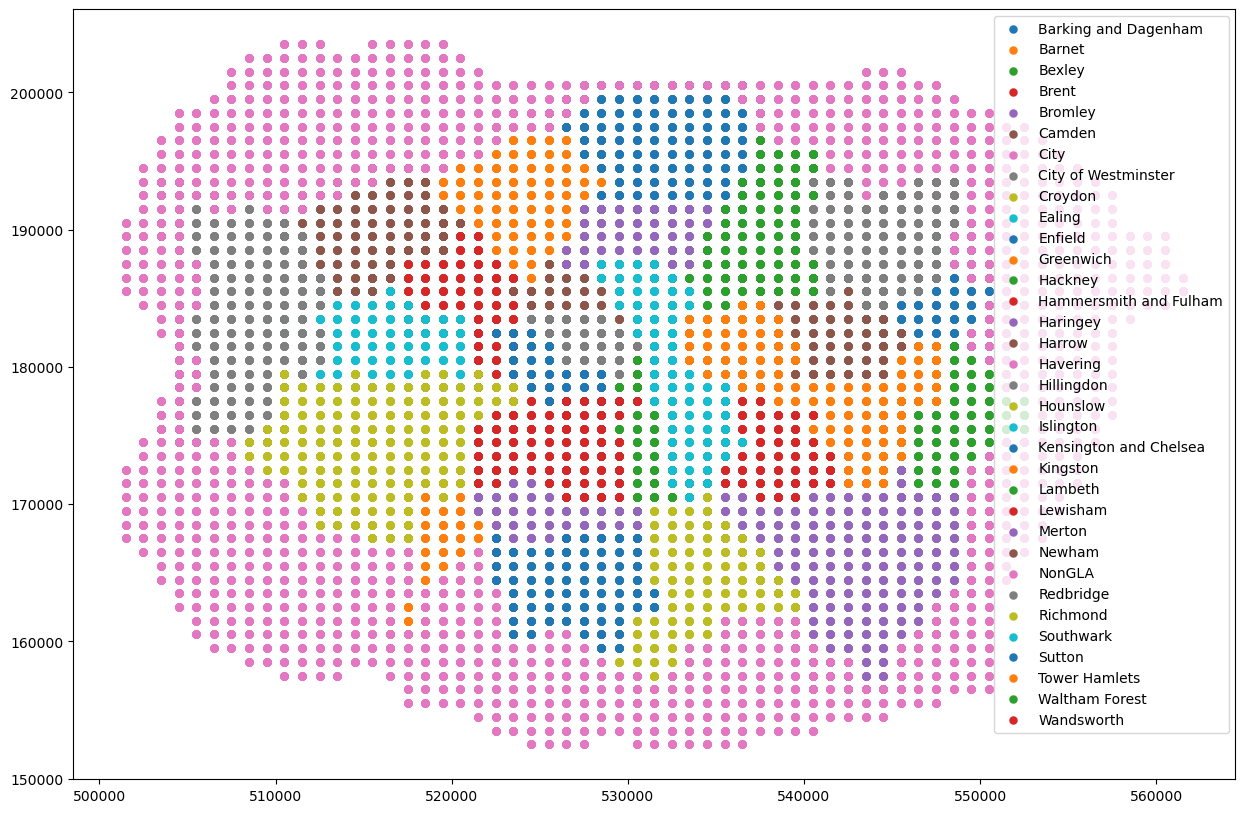

In [13]:
fig = plt.figure(figsize=(15,10))
for name, group in groups:
    plt.scatter(group["Easting"], group["Northing"], linewidths=0.1, label=name)
plt.legend()

### 3.1.2. Borough identification for the location points with pollutants concentrations.

#### 3.1.2.1. Data preparation and datasets merging.

In [16]:
NO2 = pd.read_csv(r"C:\Users\Benoit Loze\Desktop\CSCK503_EMA_KNNModel\PostLAEI2013_2013_NO2.csv")
NOx = pd.read_csv(r"C:\Users\Benoit Loze\Desktop\CSCK503_EMA_KNNModel\PostLAEI2013_2013_NOx.csv")
PM10 = pd.read_csv(r"C:\Users\Benoit Loze\Desktop\CSCK503_EMA_KNNModel\PostLAEI2013_2013_PM10.csv")
PM10d = pd.read_csv(r"C:\Users\Benoit Loze\Desktop\CSCK503_EMA_KNNModel\PostLAEI2013_2013_PM10d.csv")
PM25 = pd.read_csv(r"C:\Users\Benoit Loze\Desktop\CSCK503_EMA_KNNModel\PostLAEI2013_2013_PM25.csv")

In [17]:
NO2concentration = pd.DataFrame(NO2).rename(columns={"conct":"NO2 Concentration"})
NOxconcentration = pd.DataFrame(NOx).rename(columns={"conct":"NOx Concentration"})
PM10concentration = pd.DataFrame(PM10).rename(columns={"conct":"PM10 Concentration"})
PM10dconcentration = pd.DataFrame(PM10d).rename(columns={"conct":"PM10d Concentration"})
PM25concentration = pd.DataFrame(PM25).rename(columns={"conct":"PM25 Concentration"})

In [18]:
allpollutants = NO2concentration.drop("year", axis=1)
allpollutants.rename(columns={"x":"Easting", "y":"Northing"}, inplace=True)
allpollutants

,Easting,Northing,NO2 Concentration
0,501460,170580,31.31919
1,501460,170600,31.55455
2,501460,170620,31.79392
3,501460,170640,32.03141
4,501460,170660,32.26324
...,...,...,...
1048570,513080,189200,29.25036
1048571,513080,189220,30.86606
1048572,513080,189240,45.65853
1048573,513080,189260,29.85134


In [19]:
allpollutants["NOx Concentration"] = NOxconcentration["NOx Concentration"]
allpollutants["PM10 Concentration"] = PM10concentration["PM10 Concentration"]
allpollutants["PM10d Concentration"] = PM10dconcentration["PM10d Concentration"]
allpollutants["PM25 Concentration"] = PM25concentration["PM25 Concentration"]

In [20]:
allpollutants

,Easting,Northing,NO2 Concentration,NOx Concentration,PM10 Concentration,PM10d Concentration,PM25 Concentration
0,501460,170580,31.31919,49.21837,23.74403,9.302350,14.90253
1,501460,170600,31.55455,49.78666,23.78645,9.387261,14.91900
2,501460,170620,31.79392,50.36728,23.82961,9.473991,14.93577
3,501460,170640,32.03141,50.94635,23.87249,9.560539,14.95249
4,501460,170660,32.26324,51.51179,23.91457,9.645805,14.96894
...,...,...,...,...,...,...,...
1048570,513080,189200,29.25036,43.72404,23.68394,9.182676,15.17947
1048571,513080,189220,30.86606,47.58054,24.05139,9.925426,15.33283
1048572,513080,189240,45.65853,86.16850,27.55897,18.445180,16.80791
1048573,513080,189260,29.85134,44.97489,23.83754,9.489981,15.24104


#### 3.1.2.2. K-nearest neighbors model training and scoring.

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [23]:
#X_train = borough_location[["Easting", "Northing"]]
#y_train = borough_location[["Borough"]]
#X_test = NO2concentration[["Easting", "Northing"]]

In [24]:
X = borough_location.drop("Borough", axis=1)
y = borough_location["Borough"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=20)

In [26]:
X_predict = allpollutants[["Easting", "Northing"]]

In [27]:
model = KNeighborsClassifier(n_neighbors=5)

In [28]:
model.fit(X_train, y_train)

KNeighborsClassifier()

Model accuracy assessment:

In [30]:
model_accuracy_assessment = model.score(X_test, y_test)

In [31]:
model_accuracy_assessment = round(model_accuracy_assessment * 100,2)
print(f"The model accuracy is {model_accuracy_assessment}%.")

The model accuracy is 69.3%.


##### 3.1.2.3. K-nearest neighbors model prediction .

Classification of the pollutants concentration location points (Easting/Northing) per Borough:

In [34]:
borough_predict = model.predict(X_predict)

In [35]:
allpollutants.insert(2, "Borough", borough_predict)

In [36]:
allpollutants

,Easting,Northing,Borough,NO2 Concentration,NOx Concentration,PM10 Concentration,PM10d Concentration,PM25 Concentration
0,501460,170580,NonGLA,31.31919,49.21837,23.74403,9.302350,14.90253
1,501460,170600,NonGLA,31.55455,49.78666,23.78645,9.387261,14.91900
2,501460,170620,NonGLA,31.79392,50.36728,23.82961,9.473991,14.93577
3,501460,170640,NonGLA,32.03141,50.94635,23.87249,9.560539,14.95249
4,501460,170660,NonGLA,32.26324,51.51179,23.91457,9.645805,14.96894
...,...,...,...,...,...,...,...,...
1048570,513080,189200,Harrow,29.25036,43.72404,23.68394,9.182676,15.17947
1048571,513080,189220,Harrow,30.86606,47.58054,24.05139,9.925426,15.33283
1048572,513080,189240,Harrow,45.65853,86.16850,27.55897,18.445180,16.80791
1048573,513080,189260,Harrow,29.85134,44.97489,23.83754,9.489981,15.24104


In [37]:
allpollutants_nolocation = allpollutants.drop(["Easting","Northing"], axis=1)

In [38]:
allpollutants_nolocation

,Borough,NO2 Concentration,NOx Concentration,PM10 Concentration,PM10d Concentration,PM25 Concentration
0,NonGLA,31.31919,49.21837,23.74403,9.302350,14.90253
1,NonGLA,31.55455,49.78666,23.78645,9.387261,14.91900
2,NonGLA,31.79392,50.36728,23.82961,9.473991,14.93577
3,NonGLA,32.03141,50.94635,23.87249,9.560539,14.95249
4,NonGLA,32.26324,51.51179,23.91457,9.645805,14.96894
...,...,...,...,...,...,...
1048570,Harrow,29.25036,43.72404,23.68394,9.182676,15.17947
1048571,Harrow,30.86606,47.58054,24.05139,9.925426,15.33283
1048572,Harrow,45.65853,86.16850,27.55897,18.445180,16.80791
1048573,Harrow,29.85134,44.97489,23.83754,9.489981,15.24104


#### 3.1.2.4. Pollutants concentrations mean per Borough.

In [40]:
mean_concentrations = allpollutants_nolocation.groupby("Borough").mean()

In [41]:
mean_concentrations

,NO2 Concentration,NOx Concentration,PM10 Concentration,PM10d Concentration,PM25 Concentration
Borough,,,,,
Ealing,33.608425,54.735937,24.421157,10.987686,15.521571
Harrow,28.145769,41.918831,23.381002,8.630363,15.025520
Hillingdon,30.735225,48.506733,23.666563,9.370757,15.112070
Hounslow,33.275288,52.738197,24.199599,10.403790,15.381220
NonGLA,27.114591,40.153037,23.074241,8.271762,14.724906
Richmond,29.932098,44.545560,23.706552,9.290313,15.153755


In [42]:
mean_concentrations.to_csv(r"C:\Users\Benoit Loze\Desktop\CSCK503_EMA_KNNModel\mean_concentration_per_borough.csv")

#### 3.1.2.5. Data discoveries.

In [44]:
index = list(mean_concentrations.index)
index

['Ealing', 'Harrow', 'Hillingdon', 'Hounslow', 'NonGLA', 'Richmond']

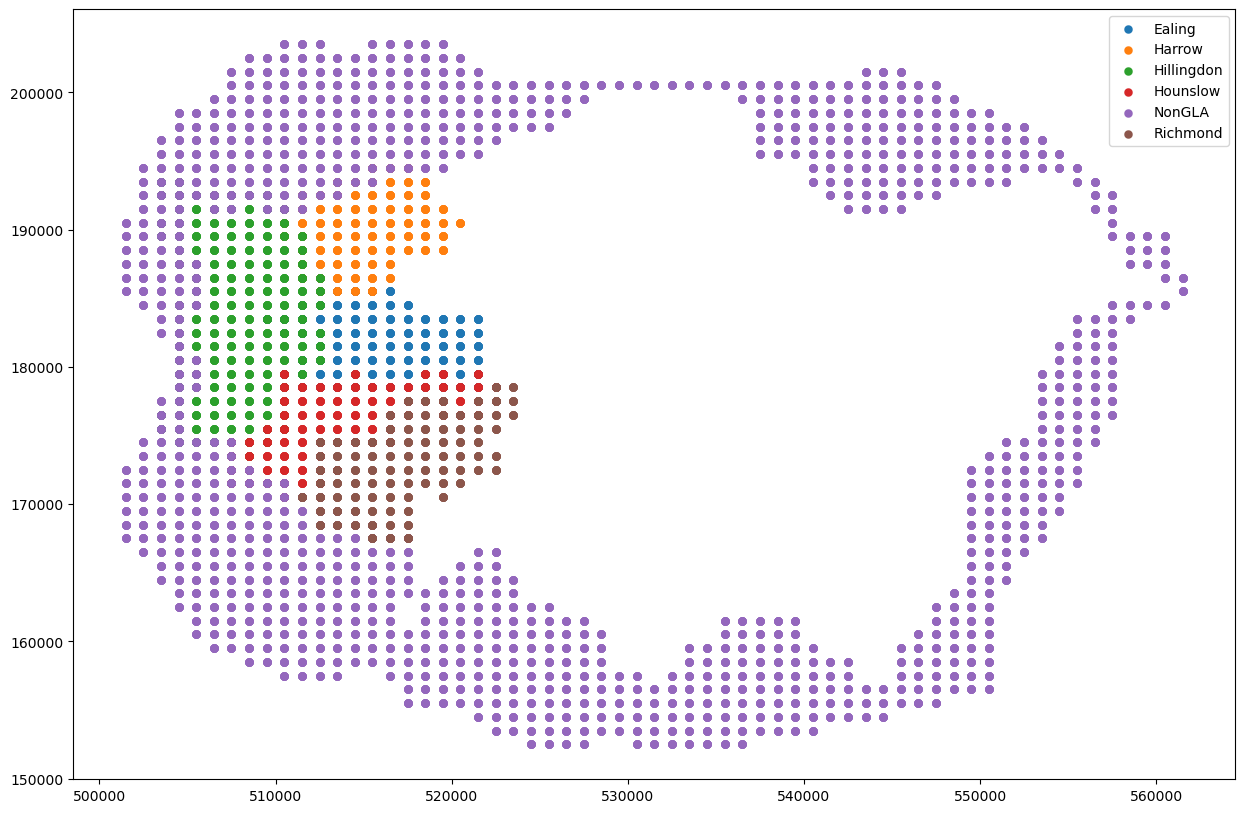

In [45]:
fig = plt.figure(figsize=(15,10))
for name, group in groups:
    if name in index:
        plt.scatter(group["Easting"], group["Northing"], linewidths=0.1, label=name)
plt.legend()

Indeed, there seems that the data available concerning the concentrations of the pollutants, which are NO2, NOx, MP10, PM10d and PM25, might only be availbale for a few number of Boroughs which are mainly located on the Western part of London. 
The NonGLA data of the plot below has only be maintained to allow a better orientation and location of the Boroughs.